### Exercise- Looking at the outcome of a multi-class classifier






#We are going to load up the MNIST digit data again

-make sure it is converted to numpy,  depending on your version of scikit lean, it may load as a pd frame

-split into test and train

-create a NN classifier for all ten classes

-look at the performance of the ten category classifier

Get the data

In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

C:\Users\tashr\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

check sizes

In [2]:
X,y=mnist["data"],mnist["target"]
print(X.shape)
print (y.shape)



(70000, 784)
(70000,)


convert to numpy if these are dataframes-

In [10]:
# you may or may not need these lines
X=X.to_numpy()
y=y.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

Check to see if the conversion worked correctly or not

The last time we worked with the MNIST digits set, we did not convert from Pandas to Numpy
form, but there were a couple of cases where we had to do conversions later in the process.

In this notebook I just did the conversion up front

In [ ]:
type(X)

Plot just to check behavior

In [5]:
%matplotlib inline

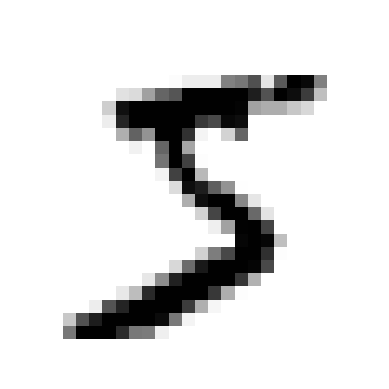

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# do a reshape here to make this a 28 x 28 binary image array

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

Set up test and train,  set up the model and train it

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Note that we did not set up y to be a set of true/false values, but rather are using the full set of number values

When we have only two categories, this is called a binary classification.   Logistic regression is the classic form of a binary classification

With more than two categories, the problem becomes a multi-category classification.

Typically we want to predict the probability that the input data is in each of the M categories we are working with.   The probabilities need to be normalized so the probabilities of the M categories add up to one.

Usually, we assign the data to the category with the highest probability associated with it.

We are still using the SciKit Learn implementation of a neural net classifier.  This function is set up like most other predictive models in SciKit Learn and it allows us to build basic Neural Network classifiers and predictors.  We will work with this implementation of the model for a couple of weeks,  then later in the semester we will work with the TensorFlow package,  which offers much more control and options in working with Neural nets.

The two main "pro-level" tools for working with Neural Networks are TensorFlow and PyTorch, with Theano a third option.   Once you are comfortable with TensorFlow,  you can work through a book or tutorial to learn PyTorch and Theano.

In [12]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(20,10,5), verbose=True, warm_start=False)

clf.fit(X_train, y_train)


Iteration 1, loss = 2.75341305
Iteration 2, loss = 2.19013267
Iteration 3, loss = 1.95206692
Iteration 4, loss = 1.71859520
Iteration 5, loss = 1.54210350
Iteration 6, loss = 1.42070220
Iteration 7, loss = 1.30094311
Iteration 8, loss = 1.20926449
Iteration 9, loss = 1.03536570
Iteration 10, loss = 0.94126993
Iteration 11, loss = 0.89593136
Iteration 12, loss = 0.85274721
Iteration 13, loss = 0.77178583
Iteration 14, loss = 0.71283147
Iteration 15, loss = 0.65073041
Iteration 16, loss = 0.60000309
Iteration 17, loss = 0.56174726
Iteration 18, loss = 0.53986111
Iteration 19, loss = 0.51617410
Iteration 20, loss = 0.49761584
Iteration 21, loss = 0.48120715
Iteration 22, loss = 0.46185633
Iteration 23, loss = 0.44238051
Iteration 24, loss = 0.42633431
Iteration 25, loss = 0.41360144
Iteration 26, loss = 0.39946901
Iteration 27, loss = 0.39084556
Iteration 28, loss = 0.37968101
Iteration 29, loss = 0.36696895
Iteration 30, loss = 0.36651373
Iteration 31, loss = 0.35230052
Iteration 32, los

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10, 5), max_iter=500,
              random_state=1, verbose=True)

In [13]:
# prediction outputs

This model gives us two outputs,  the fundamental output is actually a probability output for each class for each specimen

In the cell below, for the first specimen,  the probability of being a 7 is around 9.9e-1= 0.99 or over 99%

This is a clear claim that the object is a 7,  as the probability


SyntaxError: invalid syntax (2497220478.py, line 3)

In [14]:
clf.predict_proba(X_test[:10,:])

array([[3.66339136e-093, 6.85316245e-010, 1.16087042e-007,
        7.15647310e-006, 3.26460500e-020, 2.08955935e-012,
        3.20660687e-139, 9.99992719e-001, 1.13735003e-060,
        8.03654736e-009],
       [2.19924287e-040, 4.32824270e-013, 9.99877109e-001,
        8.46828148e-008, 4.06141840e-016, 1.61681130e-007,
        1.76895898e-090, 1.22626384e-004, 8.83130424e-076,
        1.77976764e-008],
       [5.70174950e-028, 9.99919208e-001, 1.06218809e-008,
        8.07510302e-005, 8.02749859e-025, 3.46942018e-010,
        1.02535573e-012, 6.20148725e-010, 2.90333861e-008,
        1.28254827e-015],
       [9.94589780e-001, 1.45719366e-005, 9.18678979e-004,
        2.89303103e-005, 1.94637816e-004, 5.14671940e-004,
        2.30042919e-003, 1.79782613e-006, 1.36202409e-003,
        7.44774610e-005],
       [1.62745326e-045, 4.55932178e-018, 1.06606682e-008,
        1.51939633e-013, 9.99929036e-001, 7.00646108e-011,
        2.52096206e-088, 6.06802146e-006, 1.46378612e-042,
        6.4

The predict function of clf converts the lists of probabilities to a single numerical target

In [15]:
clf.predict(X_test[:10,:])

array(['7', '2', '1', '0', '4', '1', '4', '9', '4', '9'], dtype='<U1')

We will be looking at a number of different types of classifiers during the course,  virtually all of them produce this type of output,  both a probability and a category

Many of the different methods in SciKit Learn all have the same types of functions, with similar data inputs,   performance measures and outputs,  so it is easy to use different models in a project,  or to start using new models.

We can compare these to the true classifications

In [16]:
y_test[0:10]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9'], dtype=object)

Lets look to see how well the predictions work on the whole set of training data

This is called a "resubstitution rate" of classification,   we are looking at the prediction success on the same
data that we used to train the model with.    This almost always overstates the model performance due to overfitting

Last time,  we loaded as using cross validation rates of classification,  we could do that here as, and probably should, but it is slow with NN models

At the end of this workbook,  we will look at the performance of the classifier on the test data

In [17]:
y_pred=clf.predict(X_train)

For me, the confusion matrix is really the key to understanding the classification performance

In [18]:
from sklearn.metrics import confusion_matrix

my_cm=confusion_matrix(y_train,y_pred,labels=["0","1","2","3","4","5","6","7","8","9"])
my_cm

array([[5842,    0,    7,    0,    0,   11,   10,    0,   53,    0],
       [   2, 6663,   21,   17,    4,    2,    8,   11,   13,    1],
       [   6,    3, 5817,   49,   16,    6,    7,   27,   24,    3],
       [   3,    2,   38, 5952,    0,   25,    4,   37,   43,   27],
       [   4,    0,   16,    0, 5740,   22,    6,    5,    8,   41],
       [   4,    0,   25,   27,   10, 5259,   16,    1,   55,   24],
       [  17,    0,    0,    0,    2,   40, 5848,    0,   11,    0],
       [   1,    0,   24,   10,    9,    6,    0, 6199,    1,   15],
       [  12,    5,    0,   45,    0,    8,    7,    0, 5772,    2],
       [   5,    0,    6,   41,   56,   14,    0,   30,   36, 5761]],
      dtype=int64)

# Question:

Look up the confusion matrix on the scikit-learn website,  which axis is the true assignment and which is the prediction?

What are the three most common mistakes the classifier is making?

Thinking about the numbers involved, does this make sense?

Accuracy is the number of correct predictions divided by the total number of assignments.

It is sort of the most common way to think about how a classifier is working,  but it may not really be what you want to know.

If all mistakes are equally bad, then accuracy is reasonable metric of success.

But what if not all errors were equally bad?   What if some errors were more costly than others?

but to proceed with calculationg accuracy from the confusion matric

The correct assigments are all along the diagonals, the wrong answers are the off diagonals

Accuracy= (sum along the diagonals)/(sum of all cells)

the sum along the diagonal is called the trace

In [19]:
my_cm.trace()

58853

In [20]:

my_cm.sum()

60000

In [21]:
#Question-  write a formula that computes the accuracy based on the confusion matrix

#Accuracy= (sum along the diagonals)/(sum of all cells)
my_cm.trace()/my_cm.sum()

0.9808833333333333

<Axes: >

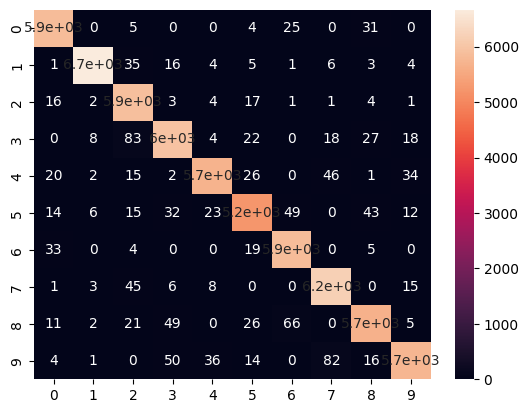

In [15]:
# Displaying the confusion matrix as a heat map

import seaborn as sns

sns.heatmap(my_cm,annot=True)

In [16]:
# controlling plot size-make the plot bigger so it is easier to read
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

<Axes: >

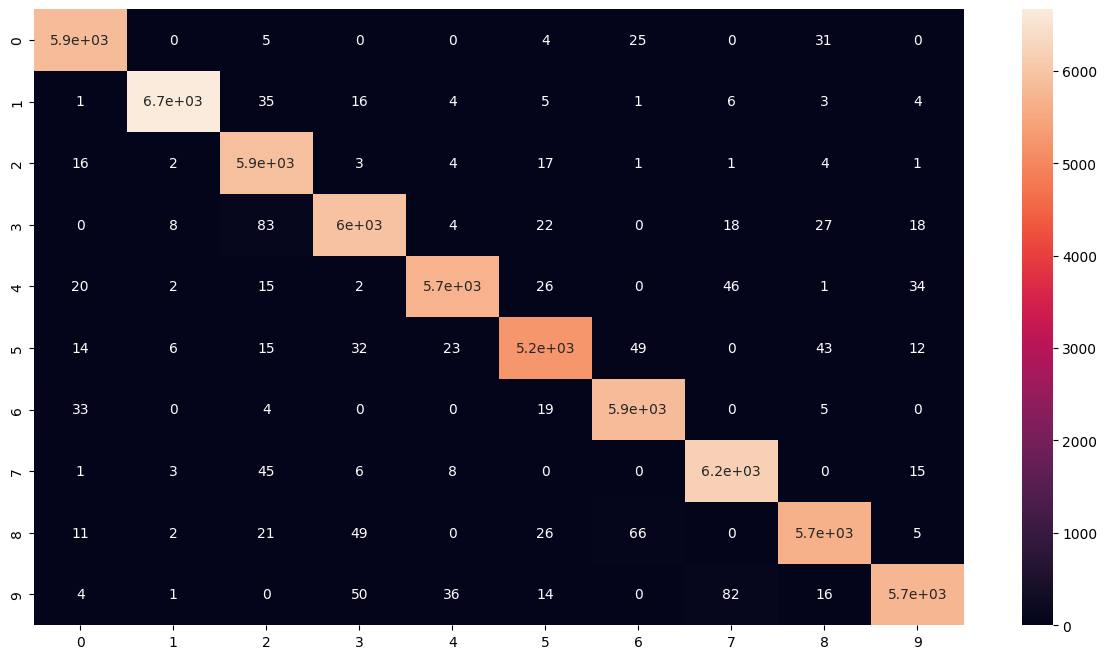

In [17]:
sns.heatmap(my_cm,annot=True)

<Axes: >

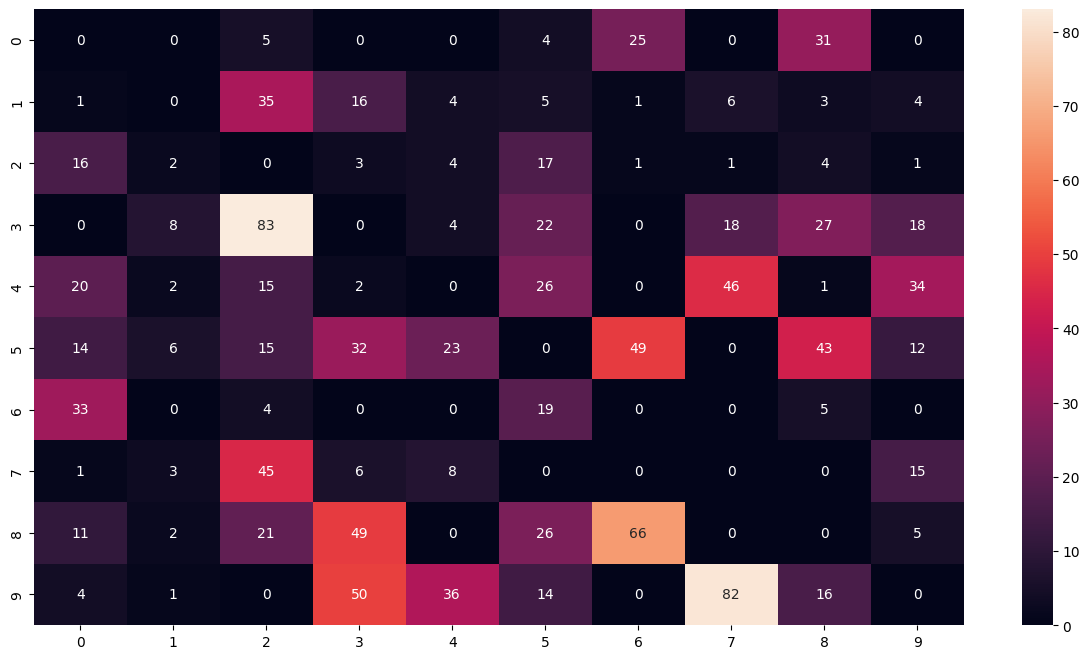

In [18]:
# The plot above is sort of disappointing,   the heatmap just shows us that correct assignments are overwhelmingly correct,
# it is hard to see how the off diagonals vary

# below,  we remove all the diagonal elements,  using the calculation
#  my_cm-np.eye(my_cm.shape[0])*my_cm,

# np.eye(my_cm.shape[0])*my_cm cell by cell multiples my_cm by an identity matrix,  giving us just the
# diagonal elements of my_cm,  which we then subtract from my_cm,  to leave only the off diagonals

import numpy as np

sns.heatmap(my_cm-np.eye(my_cm.shape[0])*my_cm,annot=True)

What are the most prominent misclassifications?

(7,9)(2,3)

Is this matrix symmeteric?   Whould you expect it to be?
It's not symmerteric but I would expect it to be because the mistaken identity should be between both of them, and not one sided. 